In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

NameError: ignored

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5539 - accuracy: 0.8103 - val_loss: 0.4495 - val_accuracy: 0.8413
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4064 - accuracy: 0.8570 - val_loss: 0.4048 - val_accuracy: 0.8552
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.8694 - val_loss: 0.3851 - val_accuracy: 0.8614
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8803 - val_loss: 0.4030 - val_accuracy: 0.8484
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.8849 - val_loss: 0.3904 - val_accuracy: 0.8572
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3074 - accuracy: 0.8884 - val_loss: 0.3524 - val_accuracy: 0.8737
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2926 - accuracy: 0.8936 - val_loss: 0.3750 - val_accuracy: 0.8649
Epoch 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8788
Test loss: 0.3371
Test accuracy: 0.8788


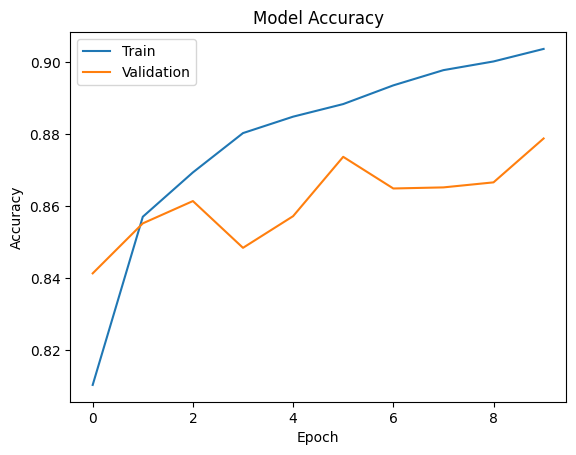

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
class_labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
]


In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 912us/step


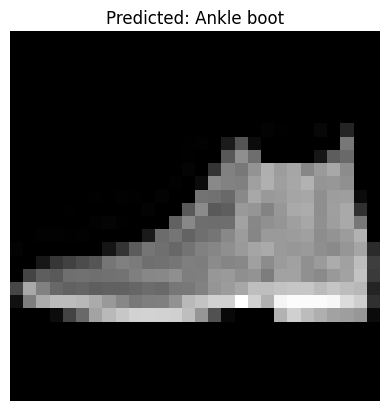

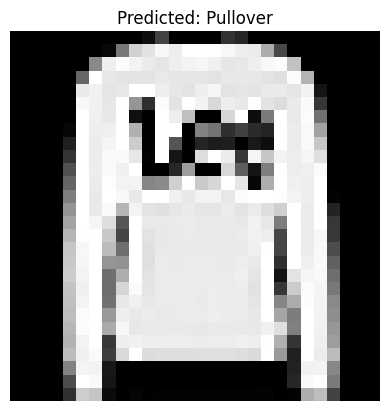

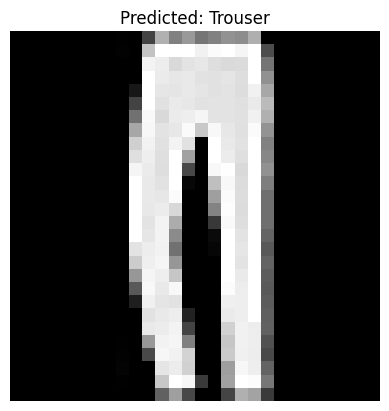

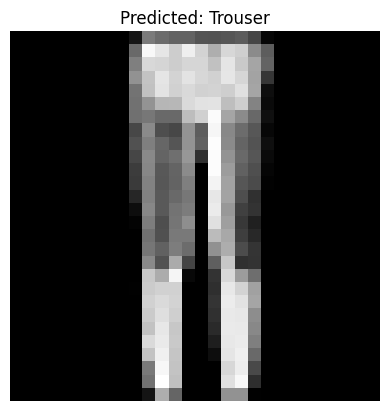

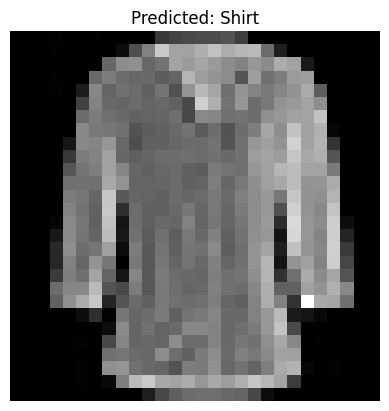

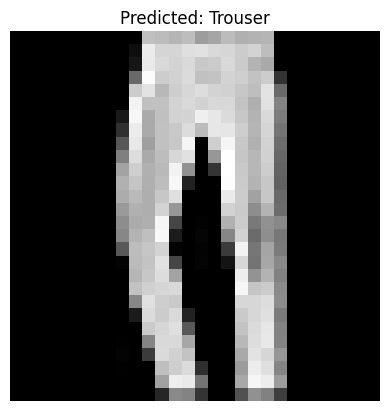

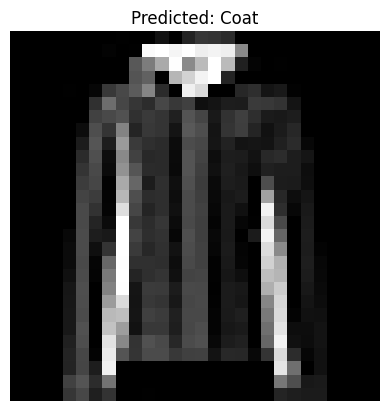

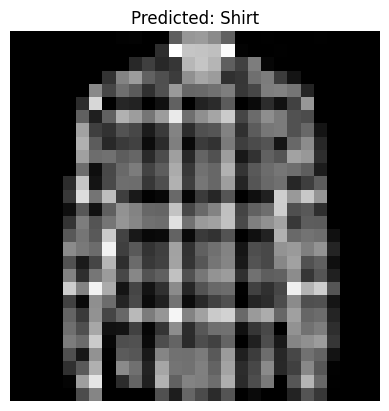

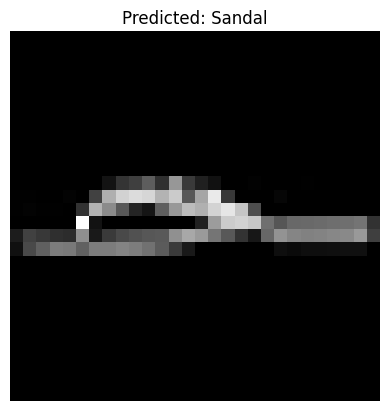

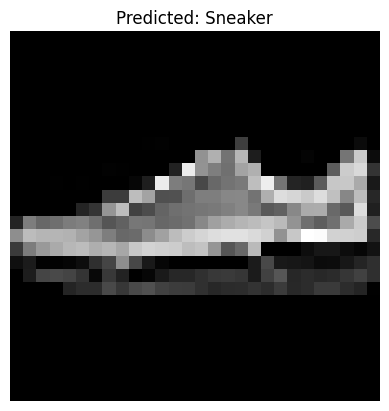

In [ ]:
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted: {class_labels[predicted_labels[i]]}')
    plt.axis('off')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mobiletrain.csv')

In [ ]:
X = data.drop('price_range', axis=1)
y = data['price_range']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
50/50 [==============================] - 2s 9ms/step - loss: 1.2486 - accuracy: 0.4281 - val_loss: 1.0702 - val_accuracy: 0.5725
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.9003 - accuracy: 0.6481 - val_loss: 0.7785 - val_accuracy: 0.6975
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.7750 - val_loss: 0.5871 - val_accuracy: 0.8075
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.8619 - val_loss: 0.4662 - val_accuracy: 0.8525
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.9025 - val_loss: 0.3879 - val_accuracy: 0.8675
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.9269 - val_loss: 0.3308 - val_accuracy: 0.8775
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2455 - accuracy: 0.9388 - val_loss: 0.2992 - val_accuracy: 0.8850
Epoch 8/100
5

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

13/13 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8975
Test Loss: 0.32361549139022827
Test Accuracy: 0.8974999785423279


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('/content/drive/MyDrive/penguins.csv')

In [ ]:
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

<ipython-input-16-f7a52ab3379b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


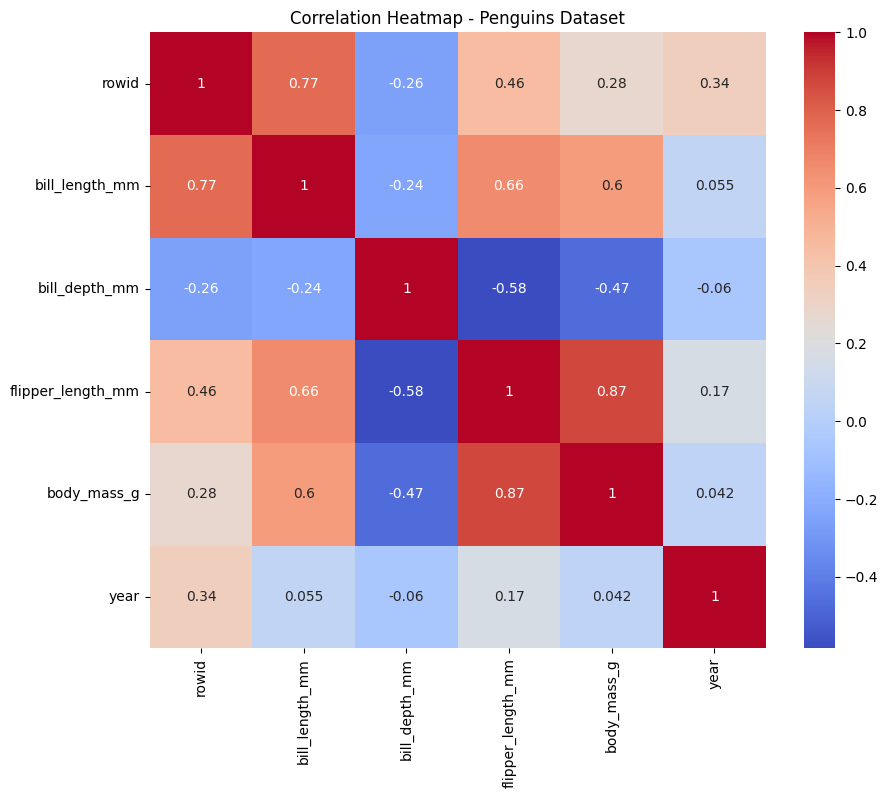

In [ ]:
import seaborn as sns
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap - Penguins Dataset')
plt.show()

In [ ]:
data = data.dropna()
X = data.drop('species', axis=1)
y = data['species']

In [ ]:
data.dropna()

rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
4        5     Adelie  Torgersen            36.7           19.3   
5        6     Adelie  Torgersen            39.3           20.6   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
4                193.0       3450.0  female  2007  
5                190.0       3650.0    male  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[333 rows x 9 columns]

In [ ]:
print(X.dtypes)

rowid                  int64
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['island', 'sex']
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [ ]:
print(X.shape)

(333, 8)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 114ms/step - loss: 1.0640 - accuracy: 0.3647 - val_loss: 0.9740 - val_accuracy: 0.5970
Epoch 2/50
3/3 [==============================] - 0s 28ms/step - loss: 0.9299 - accuracy: 0.7180 - val_loss: 0.8728 - val_accuracy: 0.7612
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.8136 - accuracy: 0.7895 - val_loss: 0.7792 - val_accuracy: 0.8060
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 0.7131 - accuracy: 0.8459 - val_loss: 0.6942 - val_accuracy: 0.8209
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6254 - accuracy: 0.8872 - val_loss: 0.6170 - val_accuracy: 0.8955
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.5483 - accuracy: 0.9248 - val_loss: 0.5462 - val_accuracy: 0.9254
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4807 - accuracy: 0.9361 - val_loss: 0.4827 - val_accuracy: 0.9552
Epoch 8/50
3/3 [==========

In [ ]:
loss = history.history['loss']

In [ ]:
print("Loss:", loss[-1])

Loss: 0.007876095362007618


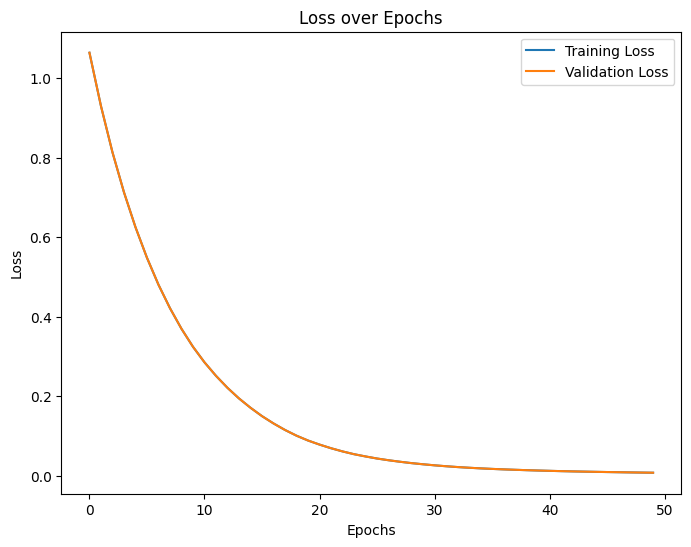

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

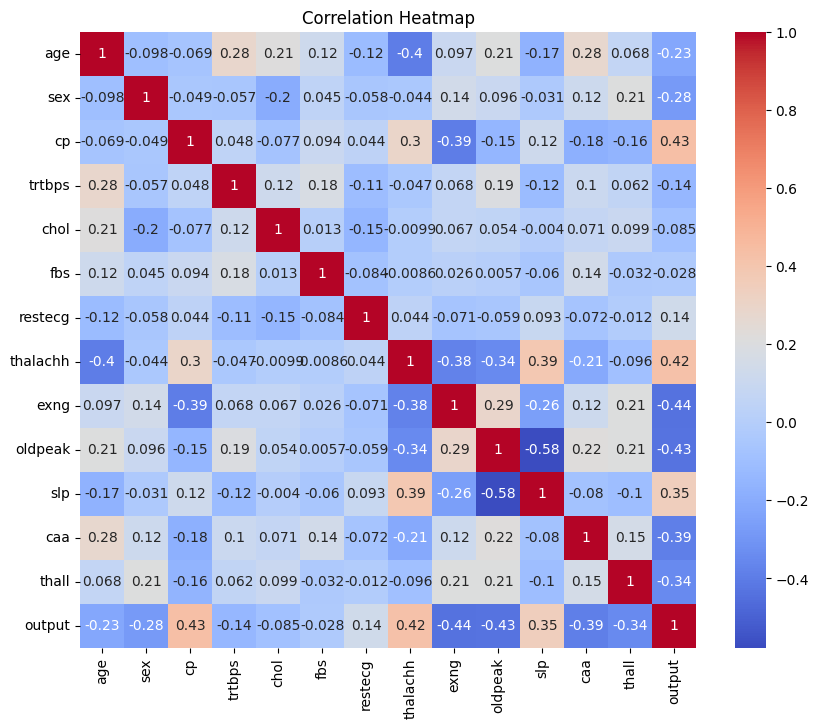

In [ ]:
import seaborn as sns
corr_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
y = tf.keras.utils.to_categorical(y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 33ms/step - loss: 0.6616 - accuracy: 0.6240 - val_loss: 0.5490 - val_accuracy: 0.7705
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5479 - accuracy: 0.7686 - val_loss: 0.5096 - val_accuracy: 0.7705
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4830 - accuracy: 0.7810 - val_loss: 0.4699 - val_accuracy: 0.7541
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4283 - accuracy: 0.8182 - val_loss: 0.4378 - val_accuracy: 0.7869
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3902 - accuracy: 0.8306 - val_loss: 0.4169 - val_accuracy: 0.7705
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8554 - val_loss: 0.4065 - val_accuracy: 0.7705
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3421 - accuracy: 0.8719 - val_loss: 0.4027 - val_accuracy: 0.7869
Epoch 8/100
8/8 [========

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.9690 - accuracy: 0.7541


In [ ]:
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: [1.0639622211456299, 0.9299253821372986, 0.8136280179023743, 0.7130776643753052, 0.6253745555877686, 0.5483359694480896, 0.48067450523376465, 0.42160671949386597, 0.3698045015335083, 0.32453420758247375, 0.28548678755760193, 0.2514835596084595, 0.22130809724330902, 0.19465333223342896, 0.1712392270565033, 0.15018530189990997, 0.1318032294511795, 0.11537732928991318, 0.10102779418230057, 0.08885562419891357, 0.0786292552947998, 0.06948265433311462, 0.06145309656858444, 0.05447256192564964, 0.04880819469690323, 0.04358639568090439, 0.03926802799105644, 0.035445746034383774, 0.03202149644494057, 0.029115701094269753, 0.026479044929146767, 0.02417769655585289, 0.0221128948032856, 0.020380590111017227, 0.018811939284205437, 0.017476195469498634, 0.016288267448544502, 0.01525061670690775, 0.014287975616753101, 0.013404492288827896, 0.012620173394680023, 0.011871782131493092, 0.011215277947485447, 0.010641327127814293, 0.010095888748764992, 0.009589562192559242, 0.00913338083773851